In [1]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Q1. Downloading the data

In [2]:
df_1 = pd.read_parquet('yellow_tripdata_2022-01.parquet')

In [3]:
df_2 = pd.read_parquet('yellow_tripdata_2022-02.parquet')

In [4]:
df_1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [5]:
df_1.info()

df_1.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

(2463931, 19)

# Q2. Computing duration

In [6]:
df_1['duration'] = df_1['tpep_dropoff_datetime'] - df_1['tpep_pickup_datetime']
df_1[['duration']]

,duration
0,0 days 00:17:49
1,0 days 00:08:24
2,0 days 00:08:58
3,0 days 00:10:02
4,0 days 00:37:32
...,...
2463926,0 days 00:05:58
2463927,0 days 00:10:39
2463928,0 days 00:11:00
2463929,0 days 00:12:03


In [7]:
df_1['duration'] = df_1.duration.dt.total_seconds() / 60

In [8]:
df_1[['duration']].head()

,duration
0,17.816667
1,8.400000
2,8.966667
3,10.033333
4,37.533333


In [9]:
df_1[['duration']].std()

duration    46.445305
dtype: float64

# Q3. Dropping outliers

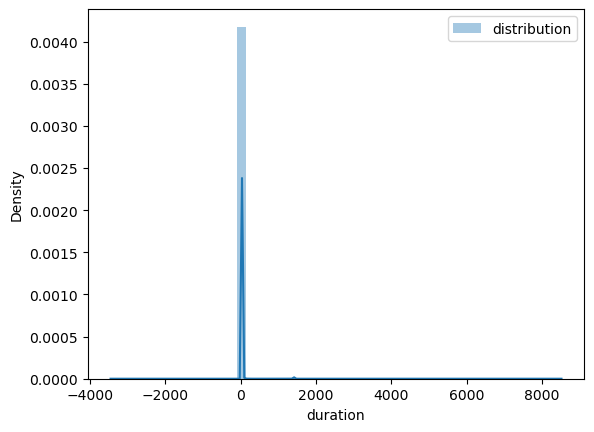

In [12]:
sns.distplot(df_1.duration, label ='distribution')
plt.legend();

In [13]:
df_1 = df_1[(df_1.duration >= 1) & (df_1.duration <= 60)]

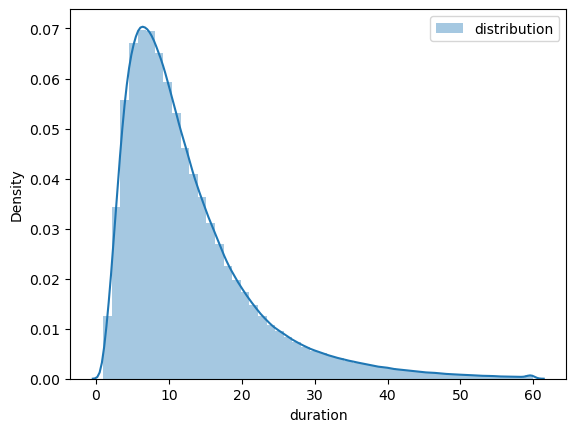

In [14]:
sns.distplot(df_1.duration, label ='distribution')
plt.legend();

In [15]:
df_1.shape

(2421440, 20)

In [16]:
2421440 / 2463931

0.9827547930522406

# Q4. One-hot encoding

In [17]:
df_1.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'duration'],
      dtype='object')

In [18]:
df_1.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
duration                        float64
dtype: object

In [19]:
df_1[['PULocationID', 'DOLocationID']].head()

,PULocationID,DOLocationID
0,142,236
1,236,42
2,166,166
3,114,68
4,68,163


In [20]:
cat_cols = ['PULocationID', 'DOLocationID']

In [27]:
dict_features = df_1[cat_cols].astype(str).to_dict(orient="records")

vectorizer = DictVectorizer()
X_train = vectorizer.fit_transform(dict_features)

In [29]:
X_train.shape

(2421440, 515)

# Q5. Training a model

In [30]:
target = 'duration'
y_train = df_1[target].values

In [33]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)
# RMSE on train
mean_squared_error(y_train, y_pred, squared=False)

LinearRegression()

6.986190685619784

# Q6. Evaluating the model

In [34]:
# RMSE on validation
def preprocess(df):
    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [36]:
df_2 = preprocess(df_2)

In [37]:
y_val = df_2[target].values

In [38]:
val_dicts = df_2[cat_cols].astype(str).to_dict(orient='records')
X_val = vectorizer.transform(val_dicts)

In [39]:
y_pred_val = lr.predict(X_val)

mean_squared_error(y_val, y_pred_val, squared=False)

7.786409438115243